## Regresion Polinomial & Feature engineering

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

In [8]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [29]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### A continuacion se tomara el coeficiente de correlacion de cada variable versus la calidad del vino

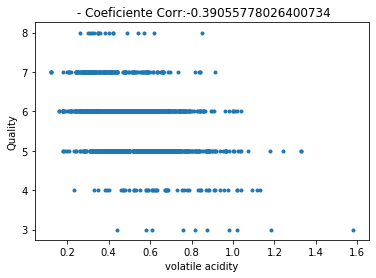

In [61]:
indexCol = 1
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

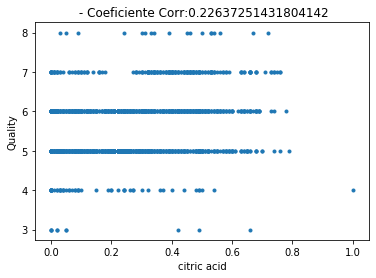

In [62]:
indexCol = 2
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

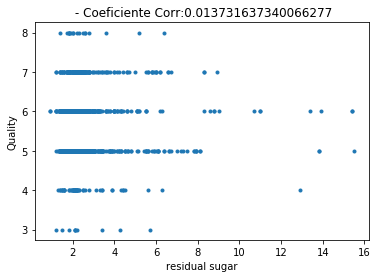

In [63]:
indexCol = 3
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

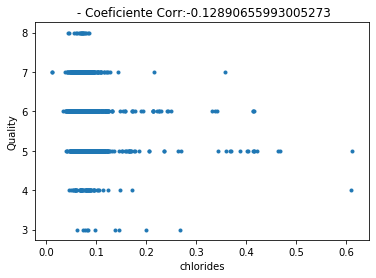

In [64]:
indexCol = 4
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

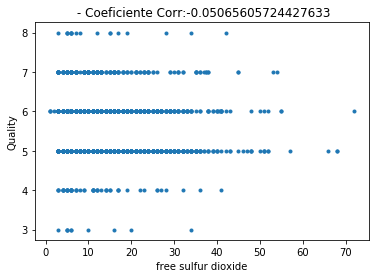

In [65]:
indexCol = 5
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

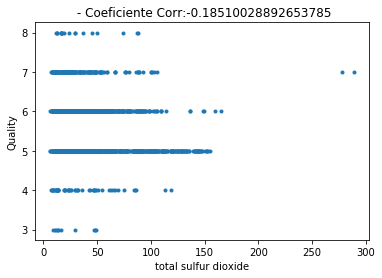

In [66]:
indexCol = 6
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

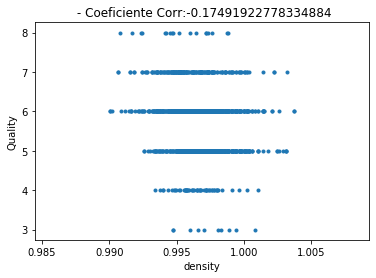

In [67]:
indexCol = 7
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

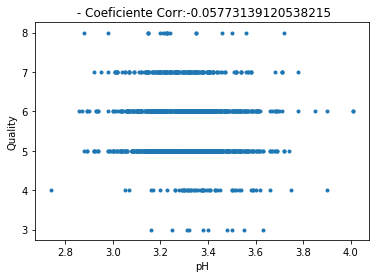

In [68]:
indexCol = 8
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

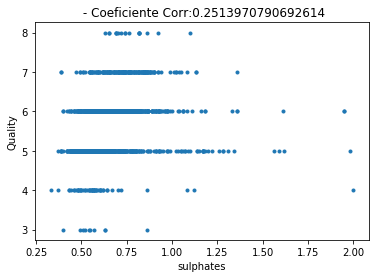

In [69]:
indexCol = 9
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

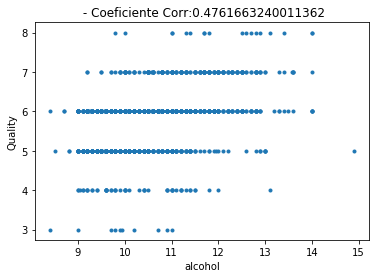

In [70]:
indexCol = 10
quality = data[data.columns[11]]
feature = data[data.columns[indexCol]] 

coefCorr = np.corrcoef(feature, quality)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(feature, quality, marker='.')  
ax.set_xlabel(data.columns[indexCol])
ax.set_ylabel('Quality')
title = " - Coeficiente Corr:" + str(coefCorr[0,1])
ax.set_title(title)
plt.show()

Se eligen 2 variables y se realiza diferentes operaciones entre ellas mismas como feature engineering

In [212]:
y = data[data.columns[11]]  #quality
a = data[data.columns[1]]   
b = data[data.columns[10]]
a2 = a*a
b2 = b*b
ab = a*b
a3 = a2*a
b3 = b2*b

In [239]:
matrix_x =  np.ones((len(a),6))
matrix_x[:,1] = a
matrix_x[:,2] = b
matrix_x[:,3] = a2
matrix_x[:,4] = b2
matrix_x[:,5] = ab

In [236]:

tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.placeholder("float",name="X") 
    Y = tf.placeholder("float",name="Y") 
    
    learning_rate = tf.placeholder("float")
    
    W = tf.Variable([[0],[0],[0],[0],[0],[0]], name="W", dtype="float")
    
    with tf.name_scope("hipotesis"):
        y_pred = tf.matmul(X,W)

    with tf.name_scope("funcion_costo"):
        cost = tf.reduce_mean(tf.pow(y_pred-Y, 2)) / (2)
        
    with tf.name_scope("Gradient_Des.Optimizer"):
        cost_summary = tf.summary.scalar("cost",cost)
        
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()


In [237]:
def train(epochs = 1000,lr = 0.1,print_every=100):
    tf.reset_default_graph()

    start = time.time()
    with tf.Session(graph=g) as sess: 

        writer = tf.summary.FileWriter('./graphs3/lr='+str(lr)+'_polinomio_grado_2', sess.graph)
        sess.run(init) 
        
        # Batch gradient descent(todo el dataset)
        for epoch in range(epochs): 

            _,c = sess.run([optimizer,cost_summary], feed_dict = {X : matrix_x, Y : y,learning_rate:lr}) 
            writer.add_summary(c, epoch+1)

            if (epoch + 1) % print_every == 0:
                co,we= sess.run([cost,W],feed_dict = {X : matrix_x, Y : y,learning_rate:lr}) 
                print(">Epoch", (epoch + 1), ": cost =", co, "\nW0 =", we[0], "\nW1 =", we[1], "\nW2 =", we[2], "\nW3 =", we[3], "\nW4 =", we[4], "\nW5 =", we[5]) 
                
        writer.close()
    end = time.time()
    
    print("Total time ",end-start)

In [241]:
train(lr=0.0001)

>Epoch 100 : cost = 0.968452 
W0 = [0.00278161] 
W1 = [0.00184525] 
W2 = [0.01715693] 
W3 = [0.00122408] 
W4 = [0.04689148] 
W5 = [0.01327348]
>Epoch 200 : cost = 0.94134974 
W0 = [0.00508735] 
W1 = [0.00339837] 
W2 = [0.0295213] 
W3 = [0.00225304] 
W4 = [0.04521865] 
W5 = [0.02359695]
>Epoch 300 : cost = 0.9161574 
W0 = [0.00734318] 
W1 = [0.00488335] 
W2 = [0.04161805] 
W3 = [0.00321881] 
W4 = [0.04359984] 
W5 = [0.03333105]
>Epoch 400 : cost = 0.8927107 
W0 = [0.00955093] 
W1 = [0.00630338] 
W2 = [0.05345691] 
W3 = [0.00412453] 
W4 = [0.04203273] 
W5 = [0.04250452]
>Epoch 500 : cost = 0.87085885 
W0 = [0.01171232] 
W1 = [0.00766146] 
W2 = [0.06504713] 
W3 = [0.00497314] 
W4 = [0.04051508] 
W5 = [0.05114477]
>Epoch 600 : cost = 0.85046566 
W0 = [0.01382901] 
W1 = [0.00896047] 
W2 = [0.07639761] 
W3 = [0.00576749] 
W4 = [0.03904482] 
W5 = [0.05927783]
>Epoch 700 : cost = 0.831407 
W0 = [0.01590258] 
W1 = [0.01020317] 
W2 = [0.08751682] 
W3 = [0.00651025] 
W4 = [0.03761992] 
W5 = [0.06

In [210]:
train(lr=0.001)

>Epoch 100 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 200 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 300 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 400 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 500 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 600 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 700 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 800 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 900 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
>Epoch 1000 : cost = nan 
W0 = [nan] 
W1 = [nan] 
W2 = [nan] 
W3 = [nan] 
W4 = [nan] 
W5 = [nan]
Total time  28.766645431518555


In [211]:
train(lr=0.00001)

>Epoch 100 : cost = 0.9946281 
W0 = [0.00066218] 
W1 = [0.0003864] 
W2 = [0.00579167] 
W3 = [0.00024127] 
W4 = [0.04844518] 
W5 = [0.00345324]
>Epoch 200 : cost = 0.99163234 
W0 = [0.00089976] 
W1 = [0.0005514] 
W2 = [0.00706569] 
W3 = [0.00035317] 
W4 = [0.04827031] 
W5 = [0.00456955]
>Epoch 300 : cost = 0.9886588 
W0 = [0.00113681] 
W1 = [0.00071565] 
W2 = [0.00833684] 
W3 = [0.00046438] 
W4 = [0.04809598] 
W5 = [0.00567941]
>Epoch 400 : cost = 0.98570734 
W0 = [0.00137333] 
W1 = [0.00087916] 
W2 = [0.00960513] 
W3 = [0.0005749] 
W4 = [0.04792221] 
W5 = [0.00678286]
>Epoch 500 : cost = 0.9827782 
W0 = [0.00160931] 
W1 = [0.00104194] 
W2 = [0.01087059] 
W3 = [0.00068474] 
W4 = [0.04774904] 
W5 = [0.00787993]
>Epoch 600 : cost = 0.9798709 
W0 = [0.00184477] 
W1 = [0.00120398] 
W2 = [0.01213322] 
W3 = [0.0007939] 
W4 = [0.04757643] 
W5 = [0.00897065]
>Epoch 700 : cost = 0.9769853 
W0 = [0.00207971] 
W1 = [0.0013653] 
W2 = [0.01339303] 
W3 = [0.00090238] 
W4 = [0.04740441] 
W5 = [0.01005

# Conclusion:

Basado en las diferentes pruebas que se realizaron, se concluye que el modelo que predice de mejor forma los datos es un modelo de grado 2, utilizando learning rate=0.0001, obteniendo como resultado los siguientes pesos:
W0 = [0.02187941] 
, W1 = [0.01361881] 
, W2 = [0.11956602] 
, W3 = [0.00845413] 
, W4 = [0.03359864] 
, W5 = [0.08721802]

Los cuales serán multiplicados por las siguientes X:
x0 = a
, x1 = b
, x2 = a^2
, x3 = b^2
, x4 = ab

# Grafo producido para el cálculo

In [246]:
%%html 
<img src="img/grafo.png", width=600, height=600>
Link: https://github.com/aomeza/CienciaDeDatosPython/blob/master/img/grafo.PNG
        

# A continuación se muestra las gráficas de error resultantes, mostrando cuál converge más rapido

In [247]:
%%html 
<img src="img/graficas_tb.png", width=600, height=600>

Link: https://github.com/aomeza/CienciaDeDatosPython/blob/master/img/graficas_tb.PNG